In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt
from sklearn.datasets import load_iris
import plotly.express as px
import plotly.io as pio
pio.renderers.default='plotly_mimetype+notebook_connected'
import warnings
warnings.filterwarnings('ignore')

In [58]:
wb = pd.read_csv("Data/WBnew.csv")
new_column_names = {'2015 [YR2015]': '2015', '2016 [YR2016]': '2016', '2017 [YR2017]': '2017', '2018 [YR2018]': '2018', '2019 [YR2019]': '2019'}
wb1519 = wb.rename(columns=new_column_names)
wb1519 = wb1519.drop(columns=['2005 [YR2005]', '2006 [YR2006]', '2007 [YR2007]', '2008 [YR2008]', '2009 [YR2009]', '2010 [YR2010]', '2011 [YR2011]', '2012 [YR2012]', '2013 [YR2013]', '2014 [YR2014]', '2020 [YR2020]', '2021 [YR2021]', '2022 [YR2022]', '2023 [YR2023]', '2024 [YR2024]'])
wbmelt = pd.melt(wb1519, id_vars=['Country Name','Series Name'], value_vars=['2015', '2016', '2017', '2018', '2019'], var_name='Year', value_name='Value')
wbmelt = wbmelt[wbmelt['Country Name'].isin(['Japan', 'France', 'Brazil', 'United States', 'Canada', 'China'])]
wbmelt = wbmelt.dropna()
wbpivot = wbmelt.pivot(index=['Country Name', 'Year'], columns='Series Name', values='Value').reset_index()
wbpivot = wbpivot.dropna(axis=1, how='all')
wbpivot.head()

Series Name,Country Name,Year,GDP per capita (current US$),"Hospital beds (per 1,000 people)",Income share held by highest 10%,"Life expectancy at birth, total (years)",Net migration,Real interest rate (%),Researchers in R&D (per million people),Secure Internet servers (per 1 million people)
0,Brazil,2015,8936.19661712113,2.35,40.9,75.106,-173611,33.8323439727973,..,161.164815967859
1,Brazil,2016,8836.28652735657,2.32,42.1,75.081,-92989,40.6983614262467,..,415.986539467638
2,Brazil,2017,10080.5092819305,2.3,42,75.383,-156296,41.7138078856955,..,1605.82544177505
3,Brazil,2018,9300.66164923219,2.26,42.5,75.633,-230334,33.1023342519639,..,2069.60200203718
4,Brazil,2019,9029.83326681073,2.24,42,75.809,-129216,31.9030727578921,..,2788.39613470957


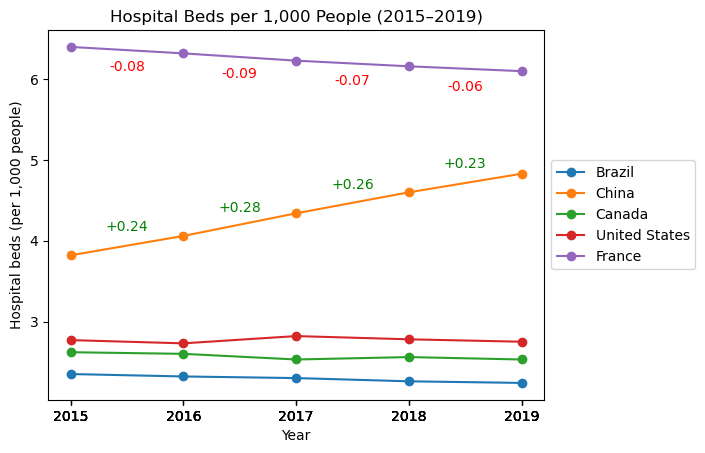

In [8]:
hos = wbmelt[wbmelt['Series Name'].isin(['Hospital beds (per 1,000 people)'])]
hos['Value'] = pd.to_numeric(hos['Value'])
hos['Year'] = pd.to_numeric(hos['Year'])
hos = hos[hos['Country Name'].isin(['France', 'Brazil', 'United States', 'Canada', 'China'])]
brazil = hos[hos['Country Name'] == 'Brazil']
china = hos[hos['Country Name'] == 'China']
canada = hos[hos['Country Name'] == 'Canada']
usa = hos[hos['Country Name'] == 'United States']
france = hos[hos['Country Name'] == 'France']
fig, ax = plt.subplots()
ax.plot(brazil['Year'], brazil['Value'], marker='o', label='Brazil')
ax.plot(china['Year'], china['Value'], marker='o', label='China')
ax.plot(canada['Year'], canada['Value'], marker='o', label='Canada')
ax.plot(usa['Year'], usa['Value'], marker='o', label='United States')
ax.plot(france['Year'], france['Value'], marker='o', label='France')
ax.set_xlabel('Year')
ax.set_ylabel('Hospital beds (per 1,000 people)')
ax.set_title('Hospital Beds per 1,000 People (2015–2019)')
ax.set_xticks(hos['Year'])
ax.legend()
for i in range(len(china) - 1):
    delta = china['Value'].iloc[i + 1] - china['Value'].iloc[i]
    plt.text(china['Year'].iloc[i] + 0.5, 
             china['Value'].iloc[i] + 0.3, 
             "+" + str(round(delta, 2)) if delta >= 0 else str(round(delta, 2)), 
             ha='center', color='green')
for i in range(len(france) - 1):
    delta = france['Value'].iloc[i + 1] - france['Value'].iloc[i]
    plt.text(france['Year'].iloc[i] + 0.5, 
             france['Value'].iloc[i] - 0.3, 
             "+" + str(round(delta, 2)) if delta >= 0 else str(round(delta, 2)), 
             ha='center', color='red')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

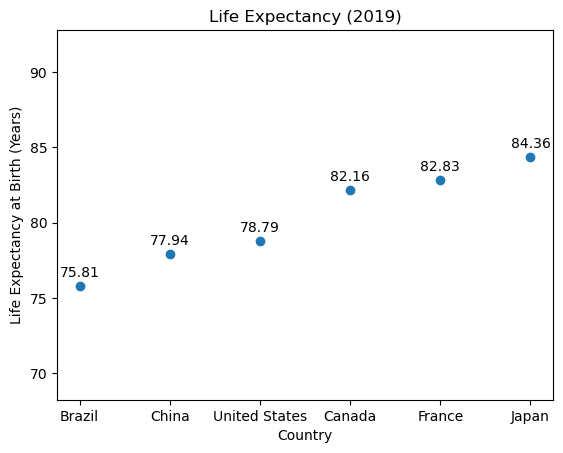

In [9]:
wb19 = wbpivot[wbpivot['Year'].isin(['2019'])]
wb19["Life expectancy at birth, total (years)"] = pd.to_numeric(wb19["Life expectancy at birth, total (years)"])
hospital_sort = wb19.sort_values("Life expectancy at birth, total (years)")
x=hospital_sort["Country Name"]
y=hospital_sort["Life expectancy at birth, total (years)"]

plt.plot(x, y, 'o')
plt.ylim(y.min()*0.9, y.max()*1.1)
plt.ylabel("Life Expectancy at Birth (Years)") 
plt.xlabel("Country")
plt.title("Life Expectancy (2019)")
for xi, yi in zip(x, y):
    plt.text(xi, yi+0.6, str(round(yi, 2)), ha='center')
plt.show()

In [10]:
interest=wb1519[wb1519['Country Name'].isin(['Australia', 'United States', 'China'])]
interest=interest[interest['Series Name'].isin(['Real interest rate (%)'])]
interest=interest.drop(columns=['Country Code', 'Series Code', 'Series Name'])
interest

,Country Name,2015,2016,2017,2018,2019
87,Australia,6.23777334791279,6.12460674928936,1.53619552626779,3.32958805124833,1.57806683471944
335,China,4.20696426973205,2.83073632160298,0.19585733630837,0.852537111572747,2.99509285161556
1655,United States,2.31051464203483,2.53723230004362,2.26529637832404,2.55474987327647,3.57306216647089


In [20]:
styled = (
    interest.style
    .format({'2015': '{:.4}%', '2016': '{:.4}%', '2017': '{:.4}%', '2018': '{:.4}%', '2019': '{:.4}%'})
    .set_caption('Real Interest Rate (%)')
    .set_table_styles([{"selector": "th", "props": [("text-align","center")]}, 
                       {"selector": "td", "props": [("text-align","left")]}]))
styled

,Country Name,2015,2016,2017,2018,2019
87,Australia,6.23%,6.12%,1.53%,3.32%,1.57%
335,China,4.20%,2.83%,0.19%,0.85%,2.99%
1655,United States,2.31%,2.53%,2.26%,2.55%,3.57%


## Final Reflection:

The first graph shows the hospital beds per capita over a 5 year period. 3 countries remained stagnant while China saw increases over the time period and France declined. The annotations on the graph specify how much change happened in China and France over the 5 year period. I decided to use +/- signs as well as color coding to indicate the positive or negative value of change. I also placed the values in between the datapoints to simply show which two years is being compared.

The next graph is a simple, sorted dotplot of life expectancy. I added text labels to each datapoint to show the exact values for each country. This is not a major change but it does help with comparing countries that are close together on the graph, allowing viewers to see the decimal values.

The styled table has a few key components that make it a proper visualization. First, the data values are rounded and have an appended percentage sign to help you read and understand what the datatype is. Second, everything is aligned to make the table look more organized and increase readability further. Lastly, I added a title to show you what the table is representing. These three small details are what makes the table adequate compared to the raw, unedited version.